# Отчет по лабораторной работе №2 "Граф интернета"

###  1. На ноутбуке запустить тест Graph500 (референс код), определить характеристики теста.

**Характеристики машины:**

``` 
    OS: Linux Ubuntu 16.04
    CPU: Intel(R) Core(TM)2 Quad CPU    Q8400  @ 2.66GHz
    Cores: 4
    RAM: 4 Gb
```

Для эксперимента была выбрана имплементация omp-csr/omp-csr (OpenMP compressed-sparse-row implementation).


Перед запуском была проведена сборка исполняемых файлов из исходного кода с помощью make.

Запуск выполнялся с помощью следующей команды:

       $ export OMP_NUM_THREADS=4
       
       $ GRAPH_500_HOME/omp-csr -R -s 16 -e 16

#### Результаты:

```
    SCALE: 16
    nvtx: 65536
    edgefactor: 16
    terasize: 1.88743679999999992e-05
    A: 5.69999999999999951e-01
    B: 1.90000000000000002e-01
    C: 1.90000000000000002e-01
    D: 5.00000000000000444e-02
    generation_time: 4.19111294400000034e+00
    construction_time: 2.54860640999999999e-01
    nbfs: 64
    min_time: 5.36578700000000033e-03
    firstquartile_time: 5.62329550000000098e-03
    median_time: 5.78980000000000033e-03
    thirdquartile_time: 6.11765824999999965e-03
    max_time: 6.53641600000000062e-03
    mean_time: 5.84278875000000027e-03
    stddev_time: 2.97689665613503295e-04
    min_nedge: 1.17848000000000000e+06
    firstquartile_nedge: 1.17848000000000000e+06
    median_nedge: 1.17848000000000000e+06
    thirdquartile_nedge: 1.17848000000000000e+06
    max_nedge: 1.17848000000000000e+06
    mean_nedge: 1.17848000000000000e+06
    stddev_nedge: 0.00000000000000000e+00
    min_TEPS: 1.80294522258069247e+08
    firstquartile_TEPS: 1.93186815278800488e+08
    median_TEPS: 2.04315596703005135e+08
    thirdquartile_TEPS: 2.09786700076756090e+08
    max_TEPS: 2.19628546567353487e+08
    harmonic_mean_TEPS: 2.01698204474703968e+08
    harmonic_stddev_TEPS: 1.29471843339292752e+06

```

Максимальный полученный результат: **0.219 GTEPS**

### 2. На каком-либо кластере запустить параллельную версию теста

Для запуска теста использовался кластер из 6 машин со следующими характеристиками:

``` 
    Ubuntu 16.04
    RAM: 8Gb
    CPU: Intel(R) Xeon(R) CPU E5-2609 v2 @ 2.50GHz
    Cores: 2
    
```

Всего кластер насчитывал 12 ядер, однако так как 

```"Number of processes 12 is not a power of two, yet SIZE_MUST_BE_A_POWER_OF_TWO is defined in main.cpp.",```

то тест был запущен на 8 процессах (по 2 процесса на 4-ех машинах).

```
    mpirun -n 8 -v --mca plm_rsh_no_tree_spawn 1 --mca orte_base_help_aggregate 0 -machinefile machinefile graph500_mpi_simple 16
```


**Результаты:**

```SCALE:                          16
edgefactor:                     16
NBFS:                           64
graph_generation:               0.615475
num_mpi_processes:              8
construction_time:              0.366006
min_time:                       0.11486
firstquartile_time:             0.133111
median_time:                    0.16339
thirdquartile_time:             0.184755
max_time:                       0.327835
mean_time:                      0.171054
stddev_time:                    0.0513058
min_nedge:                      1048570
firstquartile_nedge:            1048570
median_nedge:                   1048570
thirdquartile_nedge:            1048570
max_nedge:                      1048570
mean_nedge:                     1048570
stddev_nedge:                   0
min_TEPS:                       3.19847e+06
firstquartile_TEPS:             5.67545e+06
median_TEPS:                    6.41761e+06
thirdquartile_TEPS:             7.87741e+06
max_TEPS:                       9.12911e+06
harmonic_mean_TEPS:             6.13005e+06
harmonic_stddev_TEPS:           231647
min_validate:                   4.83797
firstquartile_validate:         7.07494
median_validate:                7.22191
thirdquartile_validate:         7.43186
max_validate:                   8.14439
mean_validate:                  7.19529
stddev_validate:                0.505963```

Максимальный полученный результат: **0.009 GTEPS**

### 4. Реализовать алгоритм построения случайного веб-графа в модели Боллобаша–Риордана (различные n=4000+, m=10..16). Определить параметры графов в этой модели.

## Код

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import choice
from operator import itemgetter

Выполним первую фазу алгоритма.

In [6]:
def phase1(n):      
    G = nx.MultiDiGraph()
    for i in range(1, n + 1):
        _add_edge(G, i)
    return G

def _add_edge(G, n, a=0.3):
    weights = [(w + a - 1) / ((a + 1) * n - 1) for w in list(G.degree().values())]
    G.add_node(n)
    weights.append(a / ((a + 1) * n - 1))
#     print(G.nodes())
#     print(weights)
#     print(sum(weights))
    G.add_edge(n, choice(G.nodes(), p=weights))

Выполним вторую фазу алгоритма.

In [7]:
def phase2(G1, n, m):
    g_edges = G1.edges()
    for e in g_edges:
        G1.remove_edge(*e)
        G1.add_edge(int(np.ceil(e[0] / m)), int(np.ceil(e[1] / m)) )
    to_remove = G1.nodes()[n:]
    G1.remove_nodes_from(to_remove)
    return G1

# def phase2_OLD(G1, m):
#     G2 = nx.MultiDiGraph()
#     for edge1 in G1.edges():
#         G2.add_edge(int(np.ceil(edge1[0] / m)), int(np.ceil(edge1[1] / m)) )
#     return G2

Метод для получения итогового графа.

In [8]:
def bollobash_riordan_model(n, m):
    G1 = phase1(m * n)
    G2 = phase2(G1, n, m)
    return G2

Метод для отрисовки графа (было полезно при отладки на графах малого размера, однако, петли отобразить не удалось, хотя они там есть :) ).

In [9]:
def draw_graph(G):
    d = nx.degree(G)
    pos = nx.spring_layout(G)
    nx.draw(G, pos, nodelist=d.keys(), node_size = [v * 50 for v in d.values()])
    plt.show()
    

Метода для высчитывания характеристик графа.

In [10]:
def graph_diameter(G):
    max_global = 0
    for n in G.nodes_iter():
        length=nx.single_source_shortest_path_length(G,n)
        n_max = max(list(length.values()))
        if n_max > max_global:
            max_global = n_max
    return max_global


def average_distance_by_components(G):
    if nx.is_directed(G):
        return [nx.average_shortest_path_length(sub_g) for sub_g in nx.weakly_connected_component_subgraphs(G)]
    else:
        return [nx.average_shortest_path_length(sub_g) for sub_g in nx.connected_component_subgraphs(G)]
    
    
def components_num(G):
     if nx.is_directed(G):
        return nx.number_weakly_connected_components(G)
     else:
        return nx.number_connected_components(G)

Методы для конструирования и отрисовки гистограммы степеней и гистограммы #(n, d) (показываются только степени с ненулевым количеством вершин, ввиду большого количество нулевых).

In [26]:
def plot_degree_histogram(data):
    ax = plt.figure().add_subplot(111)
    sort_keys = sorted(list(data.keys()))
    x_val = [x for x in range(1, len(sort_keys) + 1)]
    y_val = [data[k] for k in sort_keys]
    ax.plot(x_val, y_val)
    plt.tick_params(axis='both', labelsize=10)
    plt.xticks(x_val, sort_keys, rotation='vertical')
    plt.xlabel('degree')
    plt.ylabel('count')
    plt.xlim(0, max(x_val) + 1)
    plt.ylim(0, max(y_val) + 1)
    plt.grid(True)
    plt.show()

def plot_n_d_histogram(data):
    ax = plt.figure().add_subplot(111)
    sort_keys = sorted(list(data.keys()))
    x_val = [x for x in range(1, len(sort_keys) + 1)]
    y_val = [data[k] for k in sort_keys]
    ax.plot(x_val, y_val)
    plt.tick_params(axis='both', labelsize=10)
    plt.xticks(x_val, sort_keys, rotation='vertical')
    plt.xlabel('degree')
    plt.ylabel('#(n, d)')
    plt.xlim(0, max(x_val) + 1)
    plt.ylim(0, max(y_val))
    plt.grid(True)
    plt.show()    

Вывод всех параметров.

In [27]:
def calculate_parameters(G, n, m):
    print("-" * 30)
    print("n = ", n)
    print("m = ", m)
    print("Diameter: ", graph_diameter(G))
    print("Components number: ", components_num(G))
    av_dists = average_distance_by_components(G)
    print("Average distance by components: ", av_dists)
    print("Average distance overall: ", np.mean(av_dists))
    
    deg_hist = nx.degree_histogram(G)
    non_zero_degrees = {i: deg_hist[i] for i in np.nonzero(deg_hist)[0]}
    plot_degree_histogram(non_zero_degrees)
    
    n_d_hist = {deg: deg / count for deg, count in non_zero_degrees.items()}
    plot_n_d_histogram(n_d_hist)
    
    print("-" * 30)

## Эксперименты

### 1. n = 6, m = 2

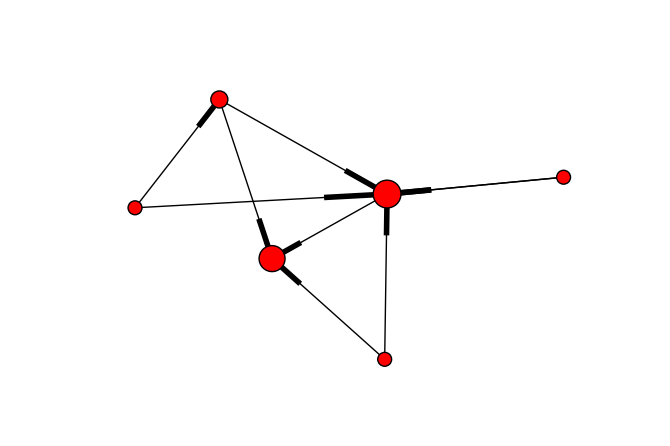

------------------------------
n =  6
m =  2
Diameter:  2
Components number:  1
Average distance by components:  [0.4]
Average distance overall:  0.4


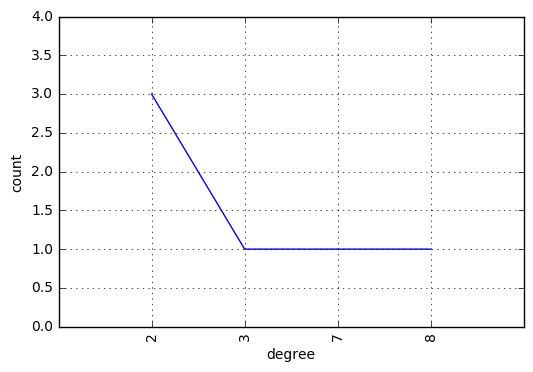

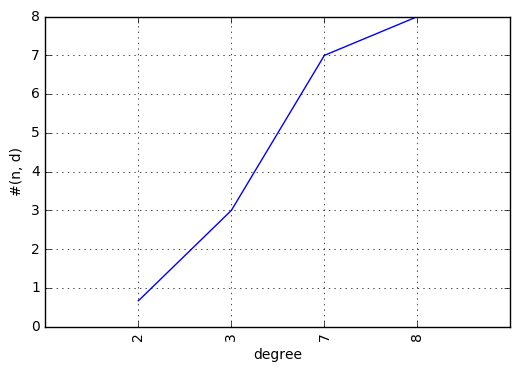

------------------------------


In [28]:
n, m = 6, 2
G1 = bollobash_riordan_model(n, m)
draw_graph(G1)
calculate_parameters(G1, n, m)

### 2. n = 100, m = 4

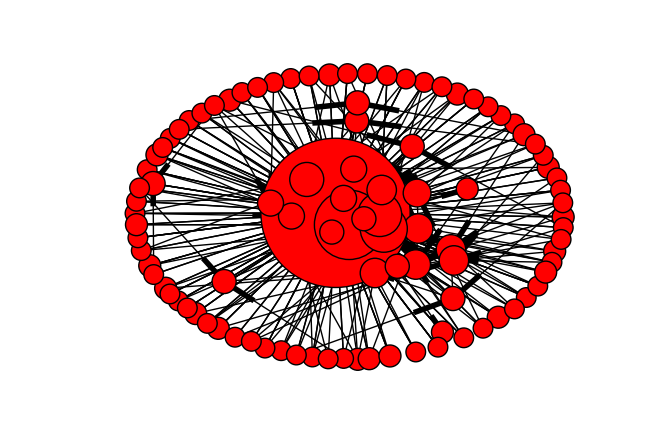

------------------------------
n =  100
m =  4
Diameter:  5
Components number:  1
Average distance by components:  [0.06474747474747475]
Average distance overall:  0.0647474747475


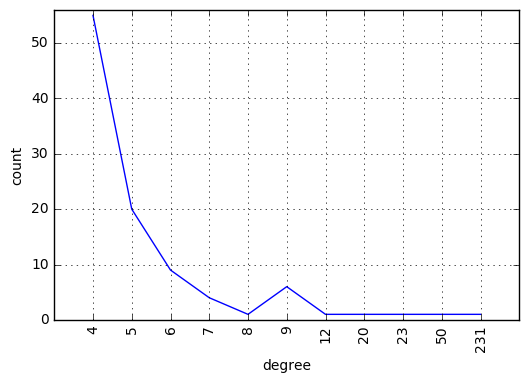

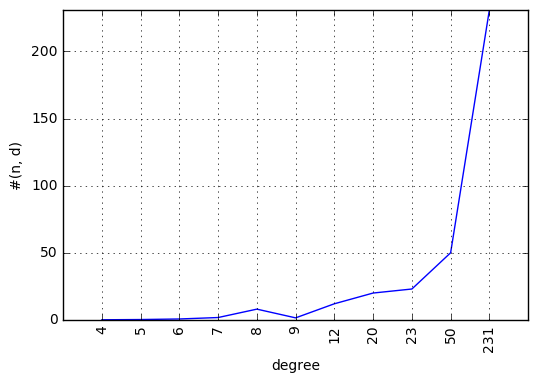

------------------------------


In [29]:
n, m = 100, 4
G1 = bollobash_riordan_model(n, m)
draw_graph(G1)
calculate_parameters(G1, n, m)

### 3. n = 1000, m = 10

In [ ]:
n, m = 1000, 10
G1 = bollobash_riordan_model(n, m)
calculate_parameters(G1, n, m)